In [13]:
import numpy as np
import cv2 as cv
from colorthief import ColorThief
import os
import matplotlib.pyplot as plt 

In [14]:
def plot_color_palette(img_path):
    '''Takes in a file path, uses the ColorThief library to pull the 4 most dominant colors and
       displays the image along with its palette.'''
    # Load the image- cv2 uses bgr color encoding so it needs to be converted to rgb for matplotlib
    image_vec = cv.imread(img_path, 1)
    RGB_img = cv.cvtColor(image_vec, cv.COLOR_BGR2RGB)

    # Pull the color palette
    color_thief = ColorThief(img_path)
    color_palette = color_thief.get_palette(quality = 1, color_count=3)

    # Reformat the color array for easy plotting
    palette = np.array(color_palette)[np.newaxis, :, :]

    # Create a plot of the image and its palette
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))

    ax1.imshow(RGB_img);
    ax1.set_title('Original Image');
    ax2.imshow(palette);
    ax2.axis('off');
    ax2.set_title('Color Palette');
    plt.show();

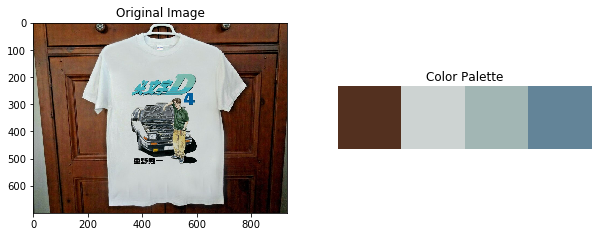

In [15]:
plot_color_palette('./images/127.jpg')

In [17]:
def remove_background(rgb_img):
    '''This code block is adapted from Chris Albon
       https://chrisalbon.com/machine_learning/preprocessing_images/remove_backgrounds/
       Given an RBG image ~700x700, creates a rectangle in the center of the frame, 
       analyzes the area outside the frame, and using cv2 GrabCut, subtracts everything 
       inside that looks like the outside'''
    
    # Create initial mask
    mask = np.zeros(rgb_img.shape[:2], np.uint8)

    # Create temporary arrays used by grabCut
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Creating a rectangle to select the center of the image
    rectangle = (80, 40, 600, 600)

    # Run grabCut
    cv.grabCut(rgb_img, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv.GC_INIT_WITH_RECT) # Initiative using our rectangle

    # Create mask where sure and likely backgrounds set to 0, otherwise 1
    mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

    # Multiply image with new mask to subtract background
    image_rgb_nobg = rgb_img * mask_2[:, :, np.newaxis]
    return image_rgb_nobg

In [18]:
image_vec = cv.imread('./images/127.jpg', 1)
RGB_img = cv.cvtColor(image_vec, cv.COLOR_BGR2RGB)

new_img = remove_background(RGB_img)

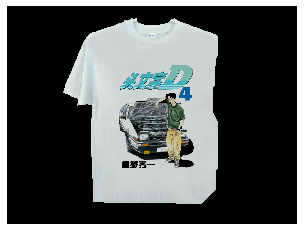

In [19]:
plt.imshow(new_img), plt.axis("off")
plt.show()

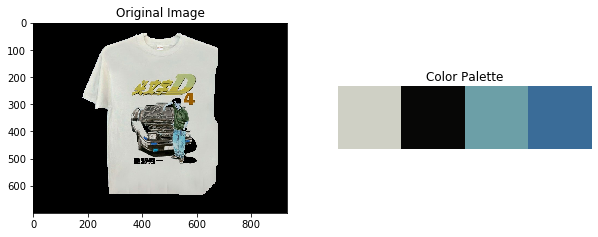

In [21]:
# The dominant value is now black for the most part, which should be easy to discard from my color arrays 

plot_color_palette('./dummy/127.jpg')

In [23]:
def convert_images(source_directory, destination_directory):
    '''Given source and destination directories, takes images ~700x700 and removes the background
       replacing it with black. The new image is then saved in the destination directory. This function
       outputs a count after every 50 photos'''
    # Iterate through all files in the directory
    for i, filename in enumerate(os.listdir(source_directory)):
        
        # Select only jpegs
        if filename.endswith(".jpg"):
            
            # Load the image
            image = cv.imread(f'{source_directory}{filename}', 1)
            # Convert to RBG
            # RGB_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            # Remove the background
            new_img = remove_background(RGB_img)
            # Save the image
            cv.imwrite(f'{destination_directory}{filename}', new_img)
            # Progress counter
            if i%50 == 0:
                print(f'{i} Images Converted')
    return print('All Images Converted')

In [24]:
convert_images('./test/', './test/')

0 Images Converted
All Images Converted


In [182]:
convert_images('./images/', './dummy/')

0 Images Converted
50 Images Converted
100 Images Converted
150 Images Converted
200 Images Converted
250 Images Converted
300 Images Converted
350 Images Converted
400 Images Converted
450 Images Converted
500 Images Converted
550 Images Converted
600 Images Converted
650 Images Converted
700 Images Converted
750 Images Converted
800 Images Converted
850 Images Converted
900 Images Converted
950 Images Converted
1000 Images Converted
1050 Images Converted
1100 Images Converted
1150 Images Converted
1200 Images Converted
1250 Images Converted
1300 Images Converted
1350 Images Converted
1400 Images Converted
1450 Images Converted
1500 Images Converted
1550 Images Converted
1600 Images Converted
1650 Images Converted
1700 Images Converted
1750 Images Converted
1800 Images Converted
1850 Images Converted
1900 Images Converted
1950 Images Converted
2000 Images Converted
2050 Images Converted
2100 Images Converted
2150 Images Converted
2200 Images Converted
2250 Images Converted
2300 Images

In [217]:
def color_palette_dataframe(filepath):
    color_dict = {}
    for i, filename in enumerate(os.listdir(filepath)):
        color_thief = ColorThief(f'{filepath}{filename}')
        color_palette = color_thief.get_palette(quality = 1, color_count=3)
        color_dict.update({filename.strip('.jpg') : [i for i in color_palette if i > (30,30,30)]})
    return pd.DataFrame(color_dict, orient = 'index')

In [203]:
color_thief = ColorThief('./dummy/7.jpg')
color_palette = color_thief.get_palette(quality = 1, color_count= 3)

In [195]:
color_palette

[(230, 209, 202), (5, 4, 4), (124, 124, 121), (132, 100, 94)]

In [186]:
color_palette

[(12, 11, 10), (202, 210, 213), (78, 114, 145), (116, 115, 115)]

In [188]:
color_palette

[(32, 27, 25), (227, 209, 190), (131, 132, 130), (128, 124, 132)]

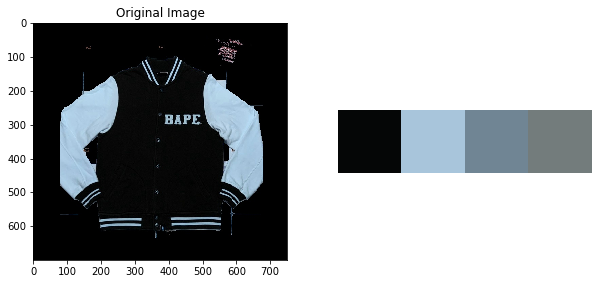

In [189]:
plot_color_palette('./dummy/0.jpg')

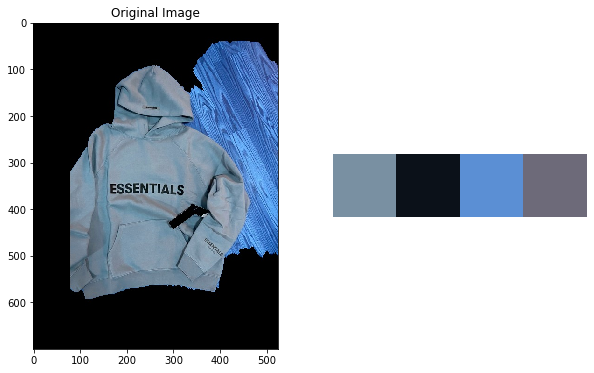

In [202]:
plot_color_palette('./dummy/7.jpg')

In [204]:
color_palette[1]

(11, 17, 25)

In [205]:
for i in color_palette:
    if i < (30, 30, 30):
        print(i)

(11, 17, 25)


In [209]:
[i > (30, 30, 30) for i in color_palette]

[True, False, True, True]

In [216]:
[i for i in color_palette if i > (30,30,30)]

[(121, 144, 162), (91, 143, 212), (109, 106, 121)]